In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA  


In [73]:
df=pd.read_csv('Realestate.csv', encoding='unicode_escape')

In [74]:
df.shape

(414, 8)

In [75]:
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [77]:
pd.isnull(df)

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
409,False,False,False,False,False,False,False,False
410,False,False,False,False,False,False,False,False
411,False,False,False,False,False,False,False,False
412,False,False,False,False,False,False,False,False


In [78]:
pd.isnull(df).sum()

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [80]:
df['X1 transaction date']=df['X1 transaction date'].astype('int')
df['X2 house age']=df['X2 house age'].astype('int')
df['X3 distance to the nearest MRT station']=df['X3 distance to the nearest MRT station'].astype('int')
df['X5 latitude']=df['X5 latitude'].astype('int')
df['X6 longitude']=df['X6 longitude'].astype('int')
df['Y house price of unit area']=df['Y house price of unit area'].astype('int')

In [81]:
df['X1 transaction date'].dtypes

dtype('int32')

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype
---  ------                                  --------------  -----
 0   No                                      414 non-null    int64
 1   X1 transaction date                     414 non-null    int32
 2   X2 house age                            414 non-null    int32
 3   X3 distance to the nearest MRT station  414 non-null    int32
 4   X4 number of convenience stores         414 non-null    int64
 5   X5 latitude                             414 non-null    int32
 6   X6 longitude                            414 non-null    int32
 7   Y house price of unit area              414 non-null    int32
dtypes: int32(6), int64(2)
memory usage: 16.3 KB


In [83]:
df.columns

Index(['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

In [84]:
df.rename(columns={'No':'House No'},inplace=True)

In [85]:
df.columns

Index(['House No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

In [86]:
df.head()

,House No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012,32,84,10,24,121,37
1,2,2012,19,306,9,24,121,42
2,3,2013,13,561,5,24,121,47
3,4,2013,13,561,5,24,121,54
4,5,2012,5,390,5,24,121,43


In [87]:
df.describe()

,House No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.0,414.000000
mean,207.500000,2012.695652,17.292271,1083.376812,4.094203,24.004831,121.0,37.543478
std,119.655756,0.460687,11.333769,1262.159441,2.945562,0.069421,0.0,13.641086
min,1.000000,2012.000000,0.000000,23.000000,0.000000,24.000000,121.0,7.000000
25%,104.250000,2012.000000,9.000000,289.000000,1.000000,24.000000,121.0,27.000000
50%,207.500000,2013.000000,16.000000,492.000000,4.000000,24.000000,121.0,38.000000
75%,310.750000,2013.000000,28.000000,1453.500000,6.000000,24.000000,121.0,46.000000
max,414.000000,2013.000000,43.000000,6488.000000,10.000000,25.000000,121.0,117.000000


BAR CHART

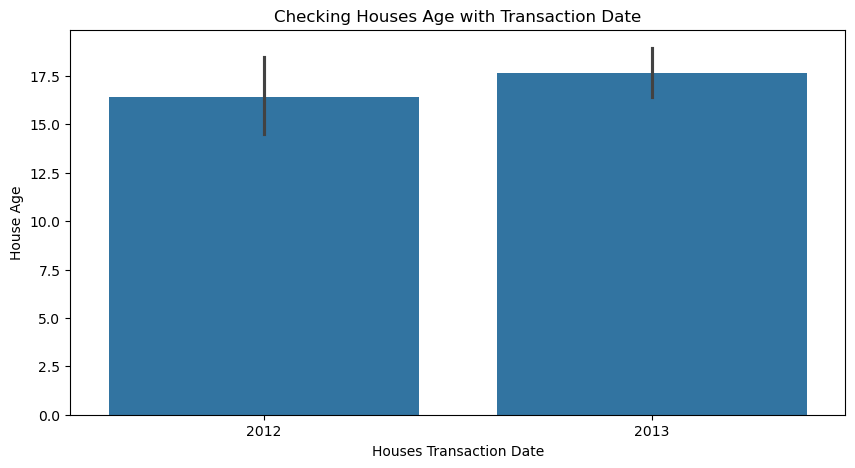

In [89]:
plt.figure(figsize=(10,5))
sns.barplot(x='X1 transaction date', y='X2 house age', data=df)
plt.title("Checking Houses Age with Transaction Date")
plt.xlabel("Houses Transaction Date")
plt.ylabel("House Age")
plt.show()

SCATTER PLOT

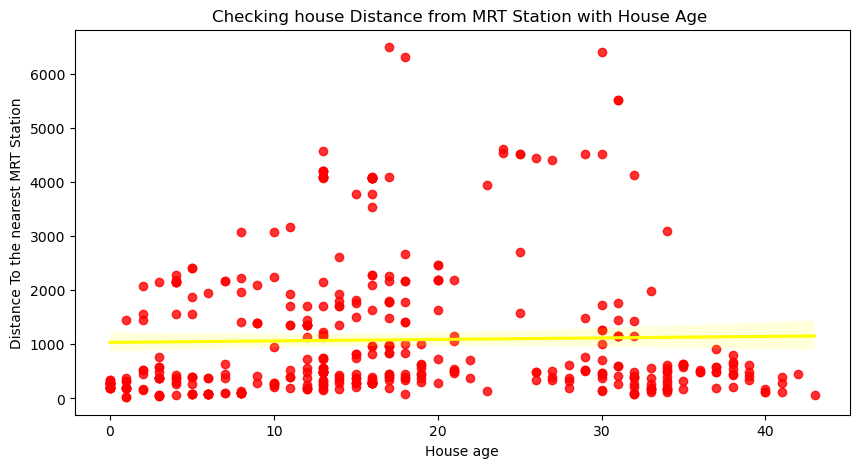

In [91]:
plt.figure(figsize=(10,5))
sns.regplot(x='X2 house age', y='X3 distance to the nearest MRT station', data=df, scatter_kws={'color': 'red'}, line_kws={'color': 'yellow'})
plt.title("Checking house Distance from MRT Station with House Age ")
plt.xlabel("House age")
plt.ylabel("Distance To the nearest MRT Station")
plt.show()

BOX PLOT

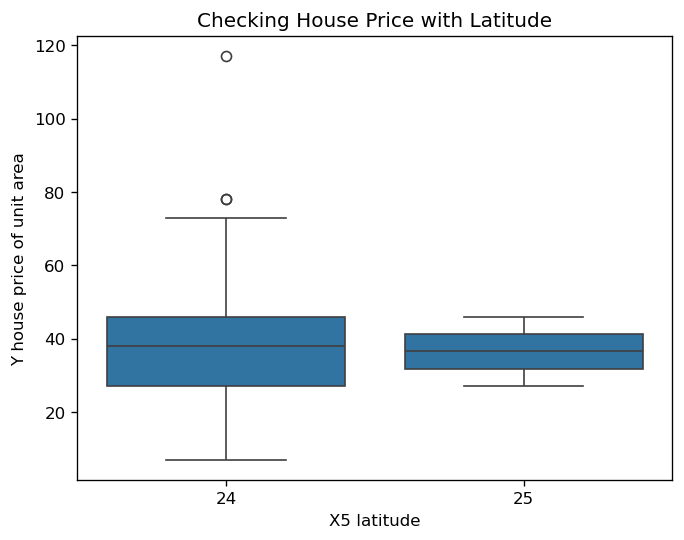

In [93]:
plt.figure(dpi=120)
sns.boxplot(x='X5 latitude', y='Y house price of unit area',data=df)
plt.title("Checking House Price with Latitude")
plt.show()


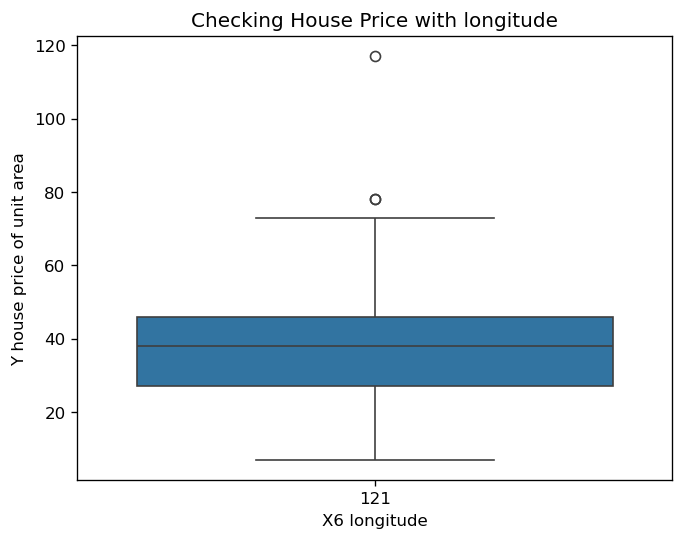

In [94]:
plt.figure(dpi=120)
sns.boxplot(x='X6 longitude', y='Y house price of unit area',data=df)
plt.title("Checking House Price with longitude")
plt.show()

HEATMAP

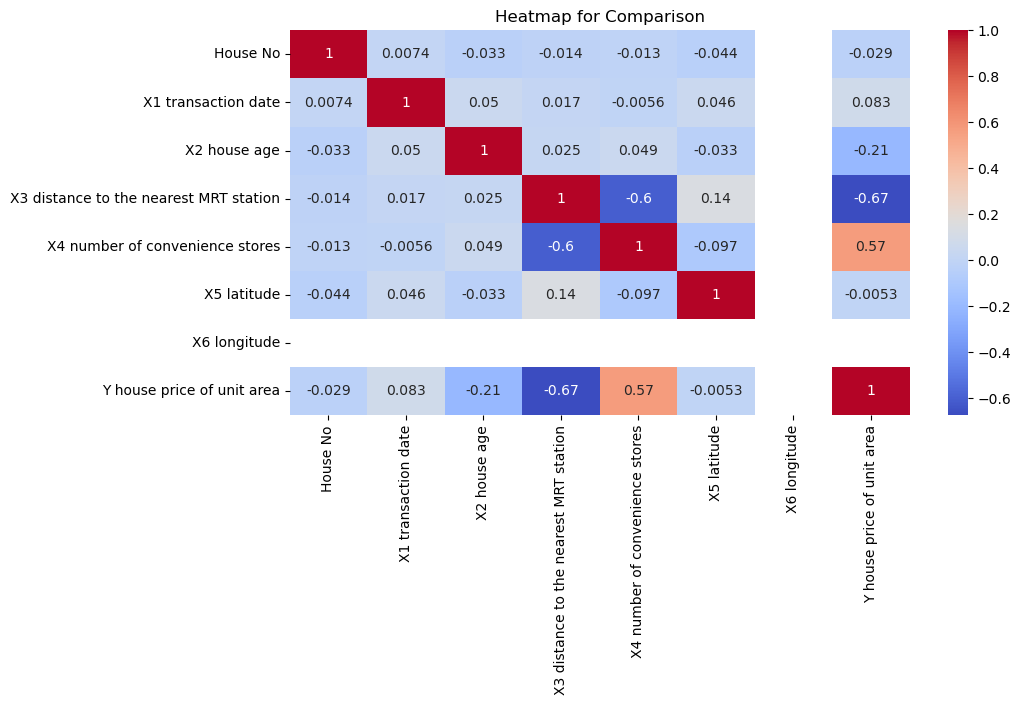

In [96]:
numeric_df = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(10, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Heatmap for Comparison")
plt.show()

ELBOW PLOT

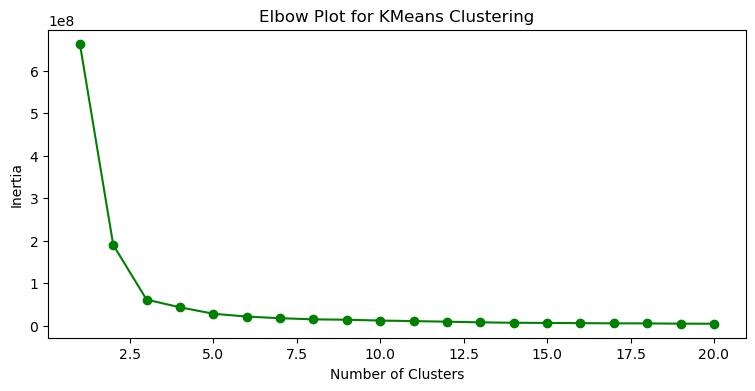

In [98]:
X = df 
inertia = []
for k in range(1, 21):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)  
plt.figure(figsize=(9, 4))
plt.plot(range(1, 21), inertia, marker='o', color='green')
plt.title('Elbow Plot for KMeans Clustering')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

Creating Clusters Plot

D:\anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


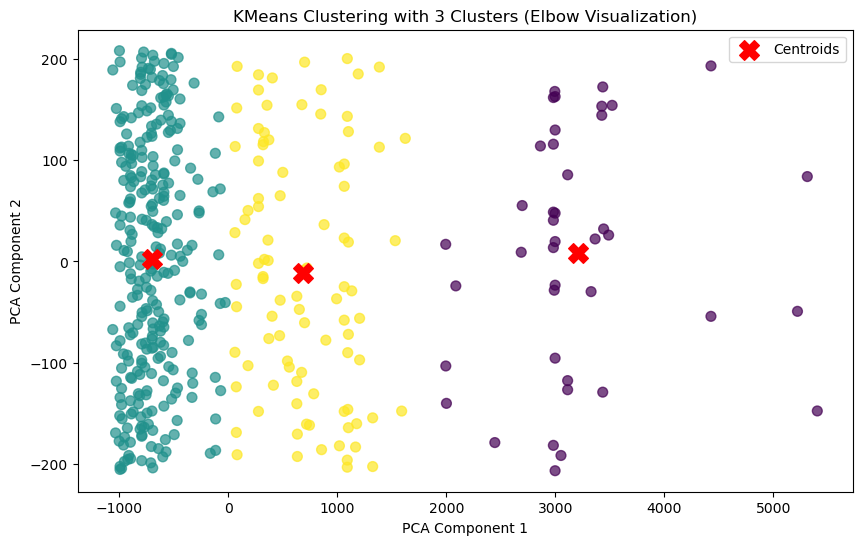

In [100]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
labels = kmeans.labels_

pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

plt.figure(figsize=(10, 6))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=labels, cmap='viridis', s=50, alpha=0.7)

centers = pca.transform(kmeans.cluster_centers_) 
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, marker='X', label='Centroids')

plt.title('KMeans Clustering with 3 Clusters (Elbow Visualization)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()

Applying fitting on the clusters

D:\anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


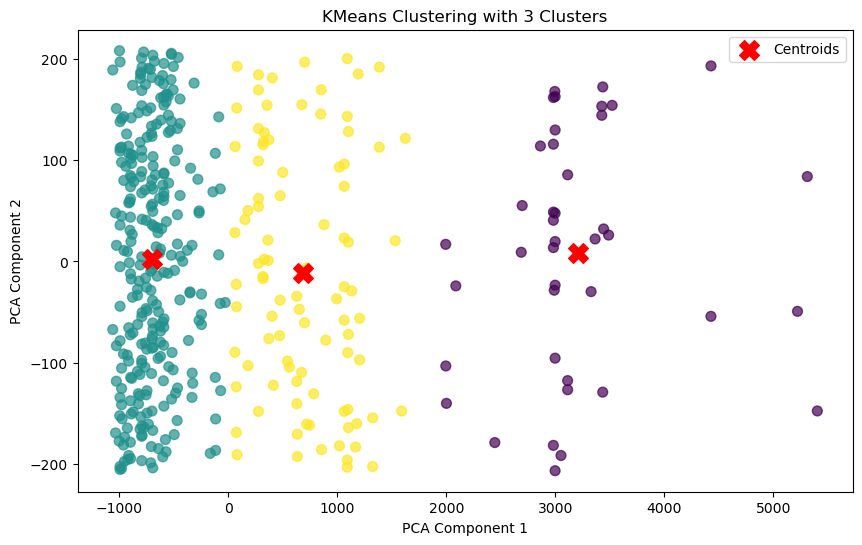

In [102]:
kmeans = KMeans(n_clusters=3, random_state=42)  
kmeans.fit(X) 
labels = kmeans.labels_
pca = PCA(n_components=2)  
X_reduced = pca.fit_transform(X)

plt.figure(figsize=(10, 6))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=labels, cmap='viridis', s=50, alpha=0.7)

centers = pca.transform(kmeans.cluster_centers_)  
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, marker='X', label='Centroids')

plt.title('KMeans Clustering with 3 Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()